# Tennis - Collaboration and Competition

In this project, two agents are trained to play the Tennis tournament. Agents control rackets to bounce the ball over a net. If an agent hits the ball over the net, it receives reward of +0.1 and a reward of -0.01 is given if an agent lets the ball hit the ground or hits the ball out of bounds. Thus goal for both agents is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Each agent receives its own, local observation. Two continous actions are available, corresponding to movement toward (or away from) the net, and jumping.

#### Dependency Installation

In [1]:
!pip -q install ./python

In [15]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from IPython import display

import player as model

%matplotlib inline
plt.ion()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
def describe_environment(env):
    '''
    Describe the tennis environment
    '''
    # get the brain
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    
    print('Default Brain: {}, {}'.format(brain_name, brain))
   
    # reset the environment
    env_info = env.reset(train_mode=True)[brain_name]
    
    # Agents in the environment
    print('Active Agents: {}'.format(len(env_info.agents)))
    
    # Action Space
    actions = brain.vector_action_space_size
    print('Action Space: {}'.format(actions))
    
    # State Space
    states = env_info.vector_observations
    
    print('State Space: {}'.format(states.shape[1]))

    print('States: {}'.format(states[0]))
    
    
def play_match(env, agent, train = True, matches = 1, max_steps = None):
    '''
    Play tennis match using given agent and environment
    param env: unity tennis environment
    param agent: m-dqn agent
    param matches: number of matches to play
    '''
    
    total_rewards = 0.
    
    for i in range(matches):
        
        step       = 0
        rewards    = np.zeros(agent.num_agents)
        brain_name = env.brain_names[0]
        env_info   = env.reset(train_mode = train)[brain_name]
        states     = env_info.vector_observations
        
        while (max_steps == None) or (j < max_steps):
            
            # get agent's action for current state
            actions = agent.select_actions(states, epsilon = 0., training = train)
            
            # take the action that agent has selected
            env_info = env.step(actions)[brain_name]
            
            # get transitioned state and reward
            states  = env_info.vector_observations
            scores  = env_info.rewards
            dones   = env_info.local_done
            
            rewards += scores
            step    += 1
            
            if any(dones): 
                break
            
        total_rewards += np.max(rewards)
    
    total_rewards /= matches
    
    print('Avg Score: {:.2f}'.format(total_rewards))
    
    
def plot_rewards(rewards):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(rewards)), rewards)
    
    plt.ylabel('Reward')
    plt.xlabel('Episode')
    
    plt.show()
    

#### Show environment details

In [4]:
env = model.get_environment()

describe_environment(env)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Default Brain: TennisBrain, Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 
Active Agents: 2
Action Space: 2
State Space: 24
States: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


#### Get the untrained agent and show it's interaction with the environment

In [34]:
# DQN Agent with no training
agent = model.get_agent(env)

In [39]:
# navigate the environment with untrained DQN agent
play_match(env, agent)

Avg Score: 0.00


#### Train Agent

Training is done in two batches - first 1500 episodes are played and that memory is forwarded for next 1500 play.

In [19]:
total_rewards = list()

# train the agent in two batches of 1500 each
rewards = model.train_players(env, agent, episodes = 1500, max_steps = 2000, share_experience = True)

total_rewards = rewards

# train the agent for second batch
rewards = model.train_players(env, agent, episodes = 1500, max_steps = 2000, share_experience = True)

total_rewards += rewards

 Episode-100, Eps: 0.9048, Avg Reward: 0.0683
 Episode-200, Eps: 0.8186, Avg Reward: 0.1203
 Episode-300, Eps: 0.7407, Avg Reward: 0.1704
 Episode-400, Eps: 0.6702, Avg Reward: 0.2543
 Episode-480, Eps: 0.6186, Reward: Avg 0.5032
 Agents have learned to solve the task. Episode-480, Avg Reward: 0.5032
 Episode-500, Eps: 0.6064, Avg Reward: 0.7405
 Episode-516, Eps: 0.5967, Reward: Avg 1.0186
 Average reward beyond max expectation, stopping training now.


#### Agent's Training Progress

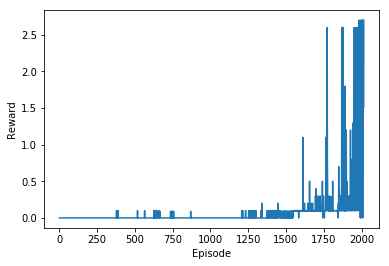

In [29]:
# show training for both batches
plot_rewards(total_rewards)

#### Show navigation of a trained agent

In [33]:
model.restore_memory(agent)

play_match(env, agent, train = False)

Avg Score: 2.60


#### Close Environment

In [40]:
env.close()